## Final Project Submission

* Student name: STEPHEN MULINGWA
* Student pace: FULL-TIME
* Instructor name: MARYANN MWIKALI


## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing our dataset
# Since datasel is really large I used argument "low_memory = False" inorder for pandas to read the data in chuncks of columns
df = pd.read_csv("data/Aviation_Data.csv", low_memory=False, index_col=0) 

In [3]:
# Check the dataframe
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Summary of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50132 non-null  object 
 8   Airport.Name            52704 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87507 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [5]:
# Checking for the dimension of the df
df.shape

(90348, 30)

In [6]:
df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
df.isnull().mean()*100

Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.512330
Airport.Name              41.665560
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6.586753
Broad.phase.of.flight     31

In [8]:
# Copy of my Original data
original_data = df.copy()

In [9]:
df = original_data.copy()

In [10]:
unique_values = df['FAR.Description'].unique()
print(unique_values)

[nan 'Part 129: Foreign' 'Part 91: General Aviation'
 'Part 135: Air Taxi & Commuter' 'Part 125: 20+ Pax,6000+ lbs'
 'Part 121: Air Carrier' 'Part 137: Agricultural'
 'Part 133: Rotorcraft Ext. Load' 'Unknown' 'Part 91F: Special Flt Ops.'
 'Non-U.S., Non-Commercial' 'Public Aircraft' 'Non-U.S., Commercial'
 'Public Use' 'Armed Forces' 'Part 91 Subpart K: Fractional' '091' 'NUSC'
 '135' 'NUSN' '121' '137' '129' '133' '091K' 'UNK' 'PUBU' 'ARMF' '103'
 '125' '437' '107']


In [11]:
unique_values = df['Aircraft.Category'].unique()
print(unique_values)

[nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']


In [12]:
df.drop(columns=['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                 'Schedule', 'Air.carrier', 'Broad.phase.of.flight', 'Publication.Date'], inplace = True)

In [13]:
df.shape

(90348, 20)

In [14]:
df.isnull().mean()*100

Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Injury.Severity            2.721698
Aircraft.damage            5.150086
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
Purpose.of.flight          8.468367
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6.586753
Report.Status              8.680878
dtype: float64

In [15]:
dict={}
for i in df.columns:
    dict[i]=len(df[i].unique())
unique_values= pd.DataFrame(list(dict.items()), columns=['Variables', 'unique_values'])
unique_values["missing_values"]= df.isna().mean().values*100
unique_values

,Variables,unique_values,missing_values
0,Investigation.Type,71,0.000000
1,Accident.Number,88864,1.614867
2,Event.Date,14783,1.614867
3,Location,27759,1.672422
4,Country,220,1.865011
5,Injury.Severity,110,2.721698
6,Aircraft.damage,5,5.150086
7,Registration.Number,79105,3.144508
8,Make,8238,1.684597
9,Model,12319,1.716695


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Registration.Number     87507 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81793 non-null  object 
 13  Purpose.of.flight       82697 non-null  object 
 14  Total.Fatal.Injuries 

In [17]:
# Drop rows with missing values only for object columns
df.dropna(subset=df.select_dtypes(include=['object']).columns, inplace=True)

In [18]:
df.isnull().mean()*100

Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          1.637422
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries      12.380124
Total.Serious.Injuries    13.489303
Total.Minor.Injuries      12.522394
Total.Uninjured            6.122879
Weather.Condition          0.000000
Report.Status              0.000000
dtype: float64

In [19]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,74669.000000,66514.000000,65672.000000,66406.000000,71264.000000
mean,1.116662,0.443185,0.237773,0.325618,2.340537
std,0.379483,3.040532,0.827569,1.452530,15.226908
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,270.000000,81.000000,171.000000,699.000000


In [20]:
df['Total.Fatal.Injuries'].sort_values().tail(20)

Event.Id
20080115X00049   NaN
20080117X00070   NaN
20080124X00101   NaN
20080201X00127   NaN
20080207X00157   NaN
20080219X00206   NaN
20080128X00114   NaN
20080125X00105   NaN
20080201X00128   NaN
20080116X00054   NaN
20080321X00351   NaN
20080117X00072   NaN
20080128X00110   NaN
20080129X00123   NaN
20080111X00041   NaN
20080129X00118   NaN
20080215X00200   NaN
20080214X00193   NaN
20080129X00122   NaN
20080125X00106   NaN
Name: Total.Fatal.Injuries, dtype: float64

In [21]:
# List of columns to replace missing values with their median
continuous_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

In [22]:
# Replace missing values with the median for the specified columns
df[continuous_columns] = df[continuous_columns].fillna(df[continuous_columns].median())

In [23]:
df.isnull().sum()

Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [24]:
df.shape

(75912, 20)

In [25]:
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
Event.Id,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Probable Cause
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause


In [26]:
cleaned_df = df.copy()

In [109]:
df = cleaned_df.copy()

In [104]:
df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number',
       'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status'],
      dtype='object')

In [29]:
df['Aircraft.damage'].nunique()

4

In [30]:
correlation_df = df.select_dtypes(include=['number'])
correlation_df.corr()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,1.000000,0.114887,0.034846,0.067822,0.323124
Total.Fatal.Injuries,0.114887,1.000000,0.167617,0.062731,-0.014628
Total.Serious.Injuries,0.034846,0.167617,1.000000,0.323809,0.003624
Total.Minor.Injuries,0.067822,0.062731,0.323809,1.000000,0.149831
Total.Uninjured,0.323124,-0.014628,0.003624,0.149831,1.000000


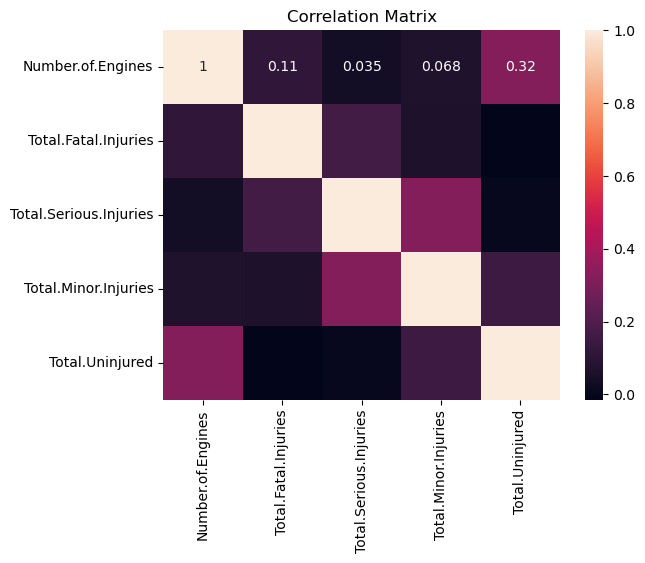

In [31]:
sns.heatmap(correlation_df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

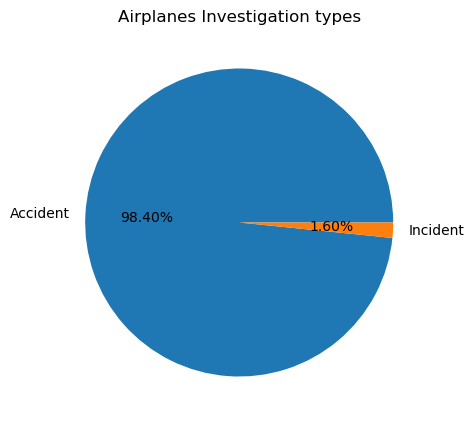

In [32]:
plt.figure(figsize = (8, 5))
plt.pie(df['Investigation.Type'].value_counts(), labels = ['Accident', 'Incident'], autopct = '%1.2f%%')
plt.title('Airplanes Investigation types')
plt.show()

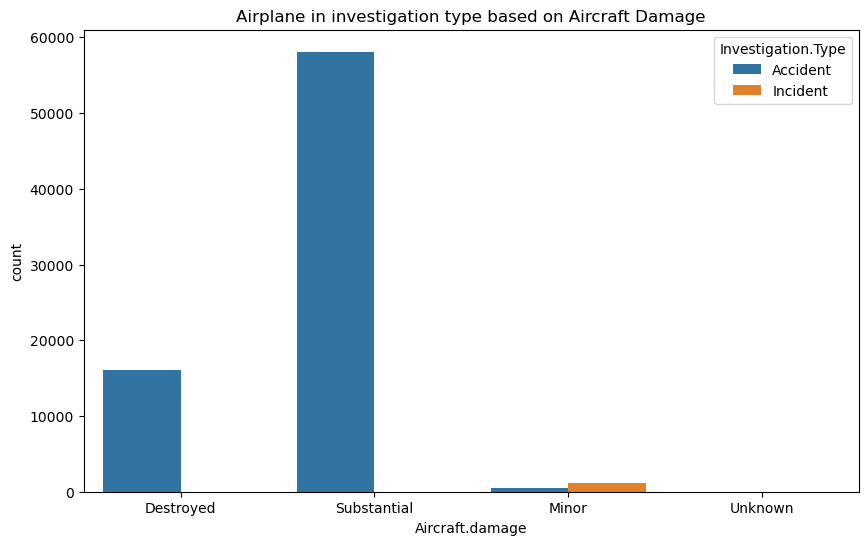

In [33]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Aircraft.damage', hue = 'Investigation.Type')
plt.title('Airplane in investigation type based on Aircraft Damage')
plt.show()

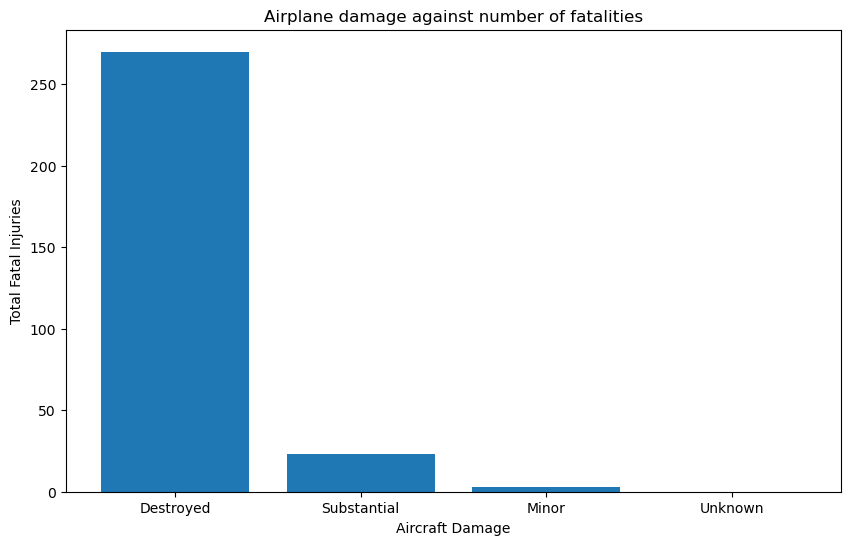

In [35]:
plt.figure(figsize = (10, 6))
plt.bar(df['Aircraft.damage'], df['Total.Fatal.Injuries'])
plt.xlabel("Aircraft Damage")
plt.ylabel("Total Fatal Injuries")
plt.title("Airplane damage against number of fatalities")
plt.show()

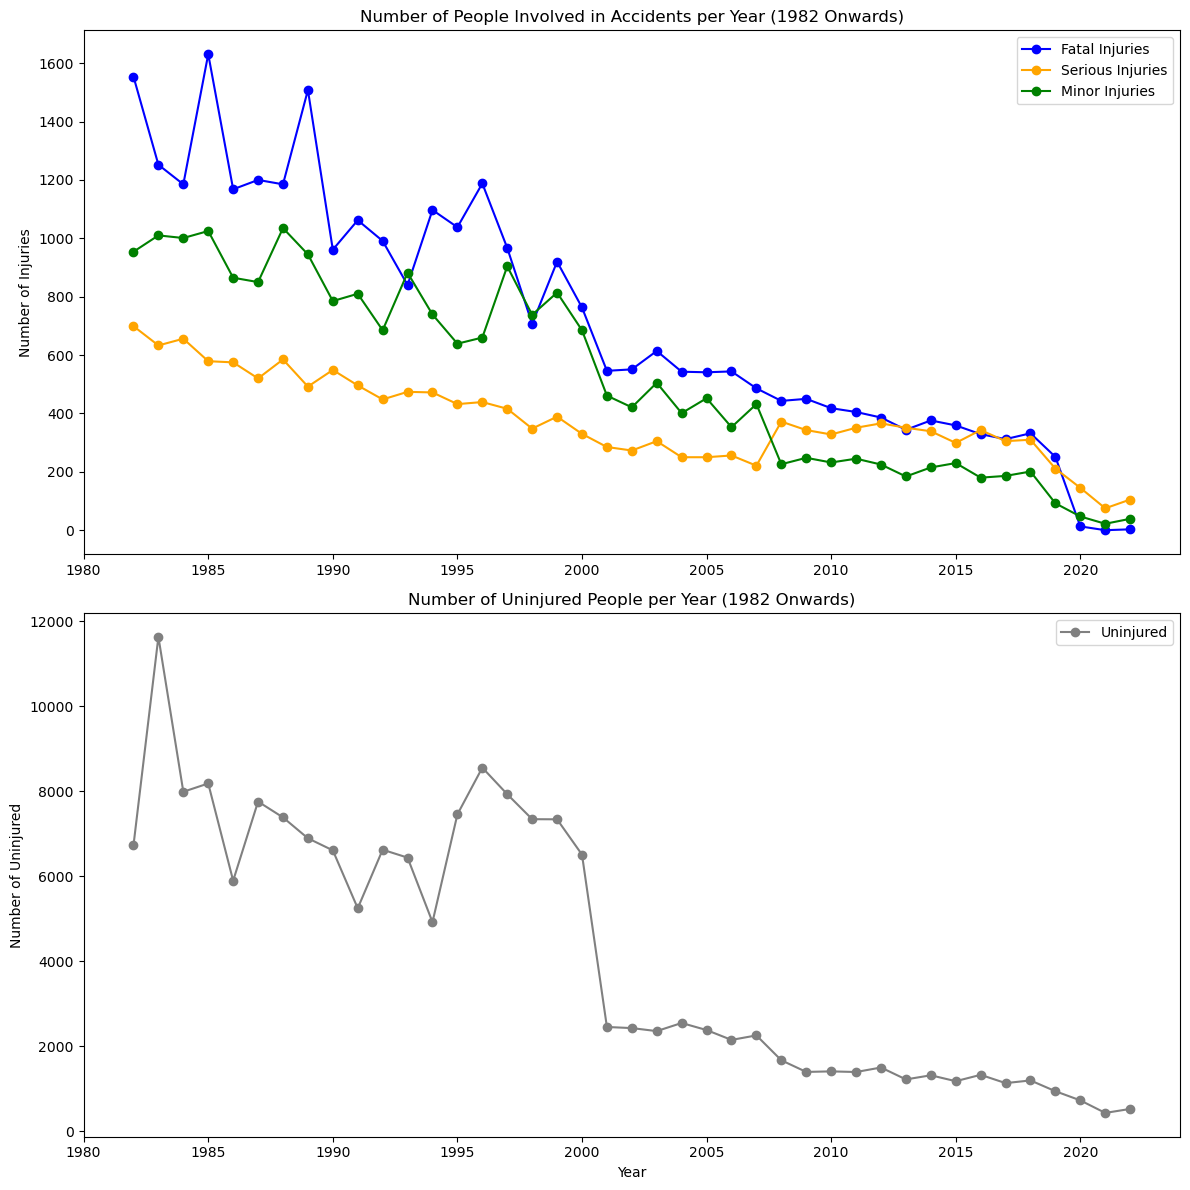

In [50]:
# Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract the year and filter the data from 1980 onwards
df['Year'] = df['Event.Date'].dt.year
df_filtered = df[df['Year'] >= 1982]

# Group by year and sum up injuries
yearly_data = df_filtered.groupby('Year').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plotting injuries on the first subplot
ax1.plot(yearly_data['Year'], yearly_data['Total.Fatal.Injuries'], label='Fatal Injuries', color='blue', marker='o')
ax1.plot(yearly_data['Year'], yearly_data['Total.Serious.Injuries'], label='Serious Injuries', color='orange', marker='o')
ax1.plot(yearly_data['Year'], yearly_data['Total.Minor.Injuries'], label='Minor Injuries', color='green', marker='o')
ax1.set_title('Number of People Involved in Accidents per Year (1982 Onwards)')
ax1.set_ylabel('Number of Injuries')
ax1.legend()

# Plotting uninjured on the second subplot
ax2.plot(yearly_data['Year'], yearly_data['Total.Uninjured'], label='Uninjured', color='gray', marker='o')
ax2.set_title('Number of Uninjured People per Year (1982 Onwards)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Uninjured')
ax2.legend()


# Tighten the layout and display the plot
plt.tight_layout()
plt.show()

In [71]:
# Convert all 'Make' values to lowercase
df['Make_lowercase'] = df['Make'].str.lower()

# Group the values and count occurrences to find non-unique ones
non_unique_makes = df['Make_lowercase'].value_counts()

# Convert all non-unique makes to a consistent format with capitalized first letters
df['Make'] = df['Make_lowercase'].str.capitalize()

# Drop the temporary 'Make_lowercase' column
df.drop(columns=['Make_lowercase'], inplace=True)

# Display the updated dataframe with merged makes
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'Hibbard norman e',
       'Waszak arthur b', 'Stephen j hoffman'], dtype=object)

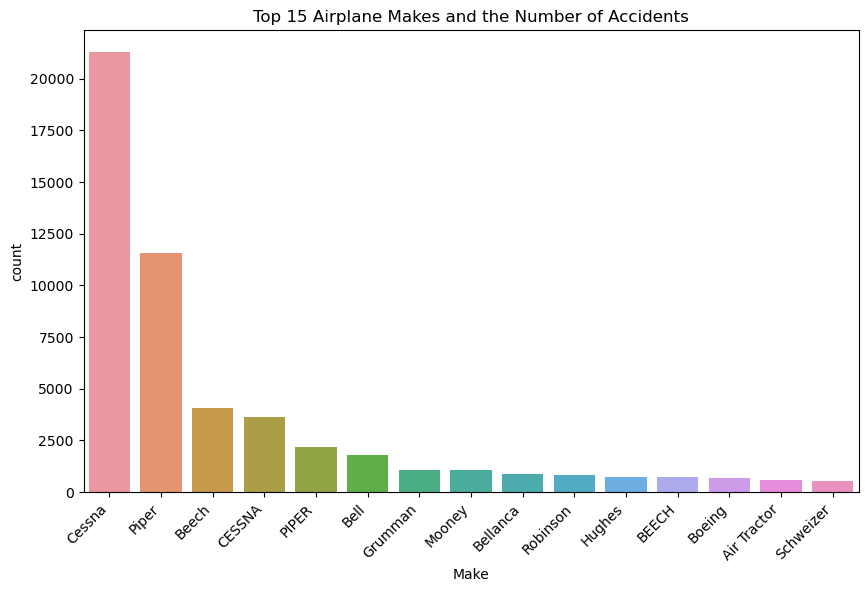

In [127]:
# Get the top 10 airplane makes by accident count
top_15_makes = df['Make'].value_counts().nlargest(15).index

# Filter the DataFrame to include only the top 10 makes
top_15_df = df[df['Make'].isin(top_15_makes)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=top_15_df, x='Make', order=top_15_makes)
plt.title('Top 15 Airplane Makes and the Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()

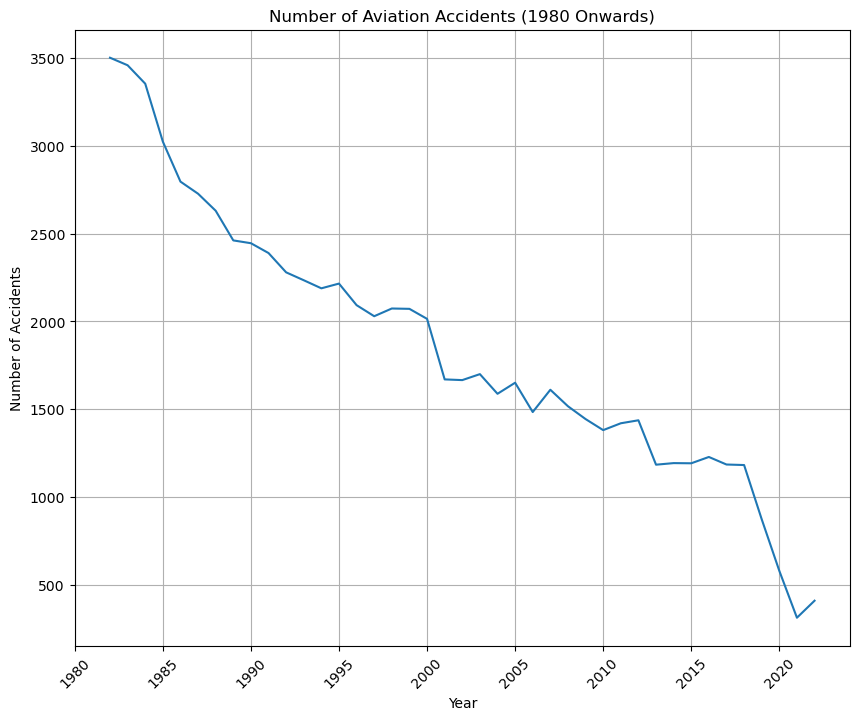

In [115]:
# Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract the year and filter the data from 1980 onwards
df['Year'] = df['Event.Date'].dt.year
df_filtered = df[df['Year'] >= 1982]

# Check for missing data and remove
df_filtered =df_filtered.dropna(subset=['Year'])

# Get the value counts of the accidents
Accident_year = df_filtered['Year'].value_counts().sort_index()
Accident_year
#Plot the year data
plt.figure(figsize=(10,8))
plt.plot(Accident_year.index,Accident_year.values)
plt.title('Number of Aviation Accidents (1980 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

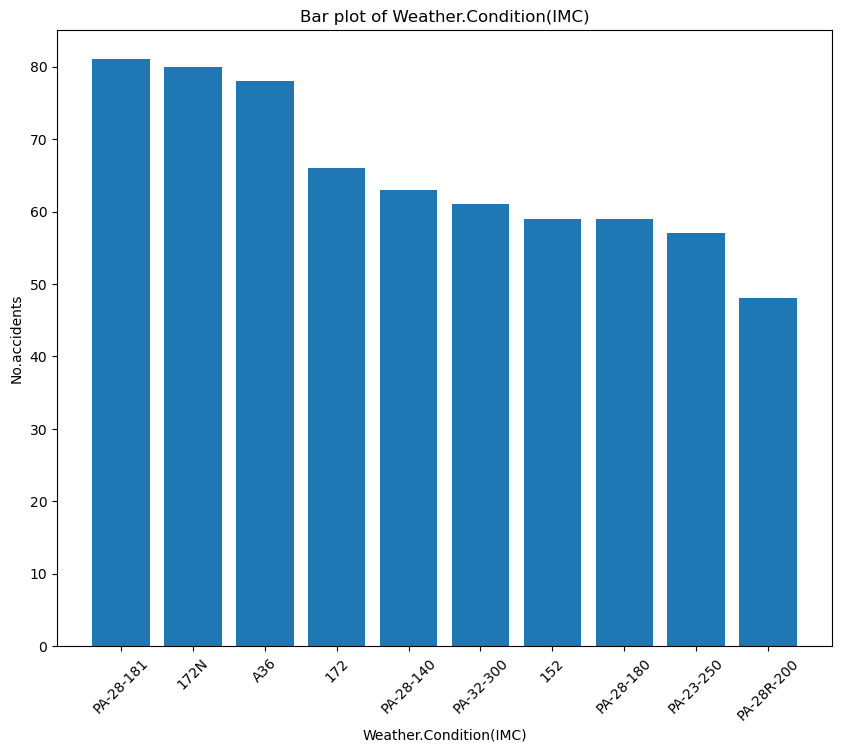

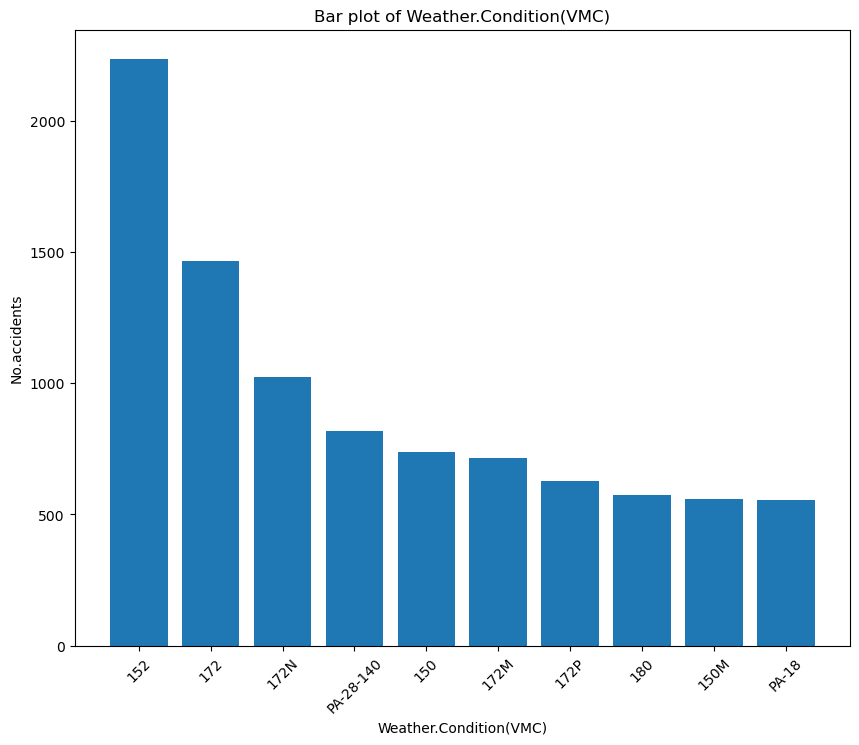

In [124]:
# Weather condition
Weather_data=df.groupby(['Weather.Condition','Model']).count()['Number.of.Engines'].sort_values(ascending=False)
Weather_data['VMC'].head(10)
Weather_data['IMC'].head(10)
# create a function
def Bar_plot(dataset,column):
    plt.figure(figsize=(10,8))
    plt.bar(x=dataset.index,height=dataset.values)
    plt.title(f'Bar plot of {column}')
    plt.ylabel('No.accidents')
    plt.xlabel(f'{column}')
    plt.xticks(rotation =45);
# Weather_data
Bar_plot(Weather_data['IMC'].head(10),'Weather.Condition(IMC)')
Bar_plot(Weather_data['VMC'].head(10),'Weather.Condition(VMC)')

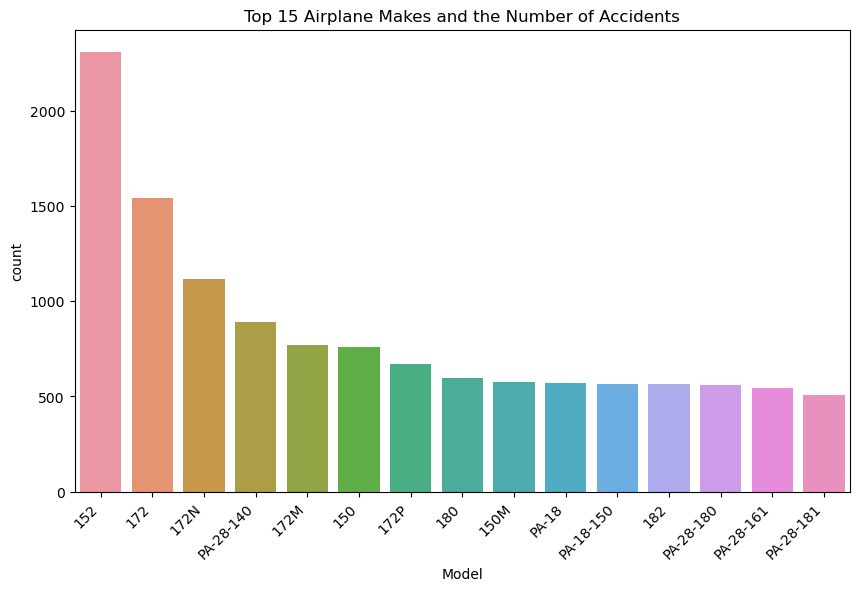

In [128]:
# Get the top 10 airplane Model by accident count
top_15_makes = df['Model'].value_counts().nlargest(15).index

# Filter the DataFrame to include only the top 10 makes
top_15_df = df[df['Model'].isin(top_15_makes)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=top_15_df, x='Model', order=top_15_makes)
plt.title('Top 15 Airplane Makes and the Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()

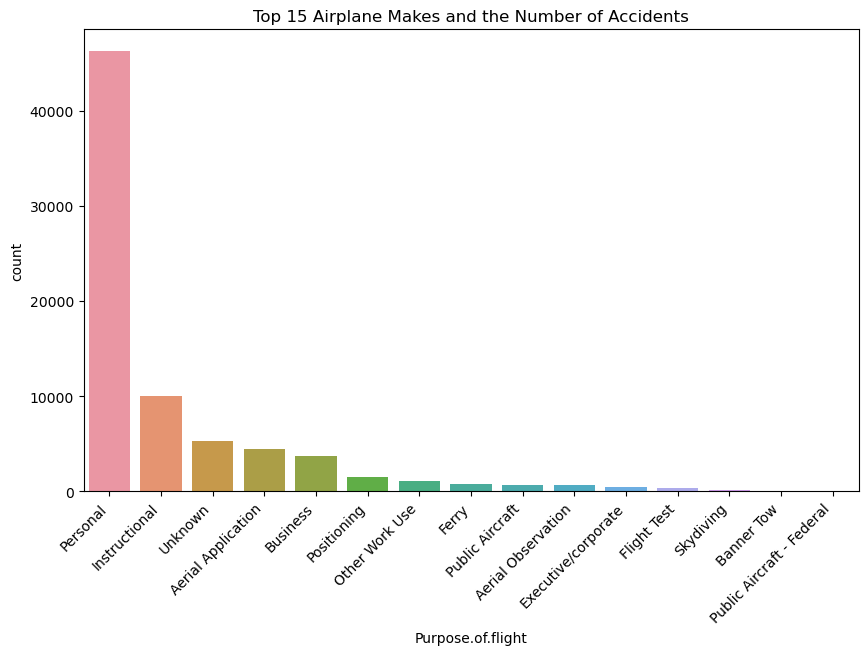

In [131]:
# Get the top 10 airplane Model by accident count
top_15_makes = df['Purpose.of.flight'].value_counts().nlargest(15).index

# Filter the DataFrame to include only the top 10 makes
top_15_df = df[df['Purpose.of.flight'].isin(top_15_makes)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=top_15_df, x='Purpose.of.flight', order=top_15_makes)
plt.title('Top 15 Airplane Makes and the Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()